In [15]:
import os
import pandas as pd
import numpy as np
pd.options.display.max_columns=999
pd.options.display.max_rows=999

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px

from sklearn.manifold import TSNE

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

### Load & display data
We'll load the stored product embedding stored in .csv format. The embedding dimension is 500.

In [ ]:
# for running on Google-colab
# !git clone https://github.com/witchapong/product-embedding-viz.git
# %cd product-embedding-viz

In [16]:
# load product embedding from csv file
prod_emb_df = pd.read_csv('sample_data/product_embedding_collab.csv')
prod_emb_df.head()

,sku_name,cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,โครงการหลวงฟักทองญี่ปุ่นออร์แกนิค,Fruit & Vegetables,0.005327,-0.001079,0.001829,0.007906,0.015663,0.007217,0.011342,0.004235,-0.000219,0.007218,-0.006806,0.000553,0.002202,-0.005444,0.010323,-0.012579,-0.002417,0.007843,-0.004941,-0.015725,0.000734,0.000348,0.009853,0.013357,-0.014612,-0.013149,-0.006402,-0.009643,-0.006029,0.001861,-0.012094,0.008373,-0.009301,0.000270,0.116293,0.006526,-0.001438,-0.001489,0.147900,0.026362,-0.017725,-0.003453,-0.005649,-0.000497,0.006950,0.007503,0.002583,0.008469,-0.007225,-0.003239,-0.012937,0.005292,0.010471,-0.017747,0.020260,0.008273,0.002659,0.001837,0.012540,0.007658,-0.002887,0.000472,0.005973,0.012428,0.001246,-0.010519,-0.004333,-0.007716,-0.003739,0.005054,0.007986,-0.003854,-0.187058,0.009910,0.013028,-0.002474,-0.002318,0.005780,0.008243,0.001876,0.003959,0.001181,0.003377,0.000998,0.007146,-0.003640,0.124974,0.004296,-0.011512,-0.013552,0.002335,0.000858,-0.013926,0.001616,-0.007837,0.003645,-0.003396,0.003723,0.007695,-0.014830,0.000619,-0.001279,-0.022601,-0.015330,-0.004665,0.001117,-0.000129,0.008915,-0.007212,-0.372333,-0.006497,-0.002170,0.003885,0.242259,-0.004665,-0.001781,-0.005101,0.003938,-0.012993,-0.003081,-0.008379,-0.005736,0.002688,-0.003978,0.002460,0.007008,0.010694,-0.000564,-0.001257,0.005086,0.010376,0.014205,-0.006113,-0.010821,0.000558,0.001737,-0.022090,0.006945,-0.020723,0.011208,-0.008462,-0.000461,0.002554,-0.439758,0.001086,0.008203,-0.004797,0.000056,0.011855,0.005048,0.006893,-0.011589,0.012353,0.008804,0.005079,0.001015,0.000291,-0.165367,-0.012583,-0.002195,0.004384,-0.003862,-0.008930,0.000537,-0.002989,-0.005566,0.003088,0.003438,-0.006556,-0.001771,-0.002347,0.017336,-0.008702,-0.009234,0.005816,0.000071,0.010294,0.009313,0.000942,0.136033,0.000431,0.001673,0.003954,-0.014914,-0.001680,-0.004860,0.003266,0.007839,-0.193040,0.003620,0.012256,0.000575,0.003274,-0.001008,-0.006299,0.001603,0.015081,0.003571,0.017536,0.009778,-0.008691,-0.030525,0.009358,0.005050,-0.004961,0.001646,-0.023206,-0.015100,-0.130219,0.010545,-0.001573,-0.014284,-0.008405,0.000295,-0.012449,0.014656,

In [17]:
prod_emb_df.cat.value_counts()

Beer,Wine & Spirits     10
Household & Pet         10
Snacks & Desserts       10
Health & Beauty Care    10
Pantry & Ingredients    10
Fresh Food & Bakery     10
Fruit & Vegetables      10
Beverages               10
Mom & Kids              10
Meat & Seafood          10
Name: cat, dtype: int64

### Product embedding visualisation by product categories
Next we'll visualise the dimension-reduced/compressed version of product embedding using TSNE to see how product embeddings of diffrent categories lie in latent space

In [18]:
tsne_df = pd.read_csv('sample_data/product_tsne_embedding_collab.csv')

fig = px.scatter(tsne_df, x='0', y='1',color='cat', hover_data=['sku_name'],width=800,
                   height=800,opacity=0.8)
fig.show()

### Product embedding query and arithmetic
We could query similar products using product embedding for similar product recommendation. At the same time, product embeddings could be combined through arithmetic operations(+/-/*)

In [24]:
def plot_with_labels(low_dim_embs, labels, filename=None, figsize=(10,10),
                    axis_lims = None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    if axis_lims is not None: plt.axis(axis_lims)
    if filename: plt.savefig(filename)

Load product embedding to Gensim's KeyedVectors

In [29]:
# replace space to underscore -> for avoiding some format conversion error
prod_emb_df['name_th'] = prod_emb_df['name_th'].map(lambda x:x.replace(' ','_'))
tsne_df['sku_name'] = tsne_df['sku_name'].map(lambda x:x.replace(' ','_'))

os.makedirs('tmp',exist_ok=True)
# save product embedding as .txt format
prod_emb_df.drop('category_en',axis=1).to_csv('tmp/product_embedding_collab.txt',sep=' ',index=False, header=False)

# convert from glove format (currently saved .txt file to word2vec format)
_ = glove2word2vec('tmp/product_embedding_collab.txt', 'tmp/product_embedding_collab_gensim.txt')

model = KeyedVectors.load_word2vec_format('tmp/product_embedding_collab_gensim.txt')

Create function fro querying full product name by text

In [326]:
# helper function for product full name query
def get_product_full_name(query, df, col):
    return df[df[col].map(lambda x:query in x)][col].values

In [327]:
get_product_full_name('โซดา',prod_emb_df,'name_th')

array(['สิงห์โซดาเครื่องดื่ม_325มล._แพค_6',
       'สิงห์โซดาขวดเล็ก_325ซีซี_แพค_24', 'ชเวปส์มะนาวโซดา_330มล._แพค_6',
       'แมกกาแรตโซดาผง_300กรัม', 'เฮลซ์บลูบอยครีมโซดา_710ซีซี',
       'เซ็นโซดายน์ยาสีฟันรีแพร์แอนด์โพรเทคท์100กรัม',
       'เซ็นโซดายน์ยาสีฟันมัลติแคร์_160กรัม',
       'เซ็นโซดายน์ยาสีฟันรีแพร์แอนด์โพรเทคท์ไวท์เทนนิ่ง_100กรัม',
       'เซ็นโซดายน์ยาสีฟันรีแพร์แอนด์โพรเทคท์เอ็กซ์ตร้าเฟรช_100กรัม',
       'แม๊กกาแรตเบคกิ้งโซดา_1กก.',
       'คาลพิสแลคโตะโซดาเครื่องดื่มอัดลมรสนมเปรี้ยว_245มล.',
       'เซ็นโซดายน์ยาสีฟันแรพพิดแอคชั่น_100กรัม', 'ชเวปส์น้ำโซดา_330ซีซี',
       'ร็อคเมาเท็นเครื่องดื่มโซดา_325มล._แพค_6',
       'สปาร์คเคิลไวท์ยาสีฟันไวท์เลมอนโซดาหลอดบีบ_100กรัม',
       'เซ็นโซดายน์ยาสีฟันมัลติแคร์_160กรัม_แพค_2',
       'ชเวปส์มะนาวโซดา_330มล._แพค_12',
       'ร็อคเมาเท็นเครื่องดื่มโซดา_325มล._แพค_24',
       'เซ็นโซดายน์ยาสีฟันกัมแคร์_160กรัม', 'สิงห์โซดาขวดเล็ก_325ซีซี',
       'เซ็นโซดายน์ยาสีฟันไวท์เทนนิ่ง_160กรัม_แพค2',
       'ดรากอนโซดาไฟเกร็ด_150ก

Whiskey + soda => Beer

In [312]:
model.most_similar_cosmul(positive=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล._แพค_6'],
                          topn=20)

[('ไฮไทแครกเกอร์รสเค็ม_141กรัม', 0.4563044011592865),
 ('ลีโอเบียร์แคน_320ซีซี_แพค_6', 0.45551955699920654),
 ('สิงห์เบียร์ขวดใหญ่_620ซีซี_แพค_12', 0.44965454936027527),
 ('คาร์เนชั่นพลัสผลิตภัณฑ์นมข้นหวานหลอดบีบ_180กรัม', 0.44847571849823),
 ('ปรุงทิพย์เกลือป่น_120กรัม', 0.4470084309577942),
 ('ทไวนิงส์ชาเอิร์ลเกรย์_2กรัม_แพค_25', 0.446900337934494),
 ('ทิปโก้สควีซน้ำส้มวาเลนเซียพาสเจอร์ไรส์_1ลิตร', 0.4360201954841614),
 ('อิโตเอ็นชาเขียวญี่ปุ่น_2กรัม_แพค_20ซอง', 0.4347131848335266),
 ('ไฮเนเก้นเบียร์ขวด_620มล._แพค12', 0.43131160736083984),
 ('ช้างคลาสสิกเบียร์_320มล._แพค_6', 0.43001726269721985),
 ('ช้างเบียร์แคน_320ซีซี_แพค_24', 0.42953845858573914),
 ('ไฮเนเก้นเบียร์แคน_490มล._แพค_4', 0.4289063513278961),
 ('ตรามือพริกขี้หนูป่น_45กรัม', 0.4278852343559265),
 ('อิโตเอ็นโออิโอชาซาร่าซาร่า_40กรัม', 0.4274154603481293),
 ('สิงห์เบียร์กระป๋อง_320ซีซี_แพค_6', 0.4266737997531891),
 ('ลิโก้ลูกเกด_250กรัม', 0.4263189733028412),
 ('ลินน้ำตาลทรายธรรมชาติชนิดซอง_6กรัม_แพค_50ซอง', 0.42570763826

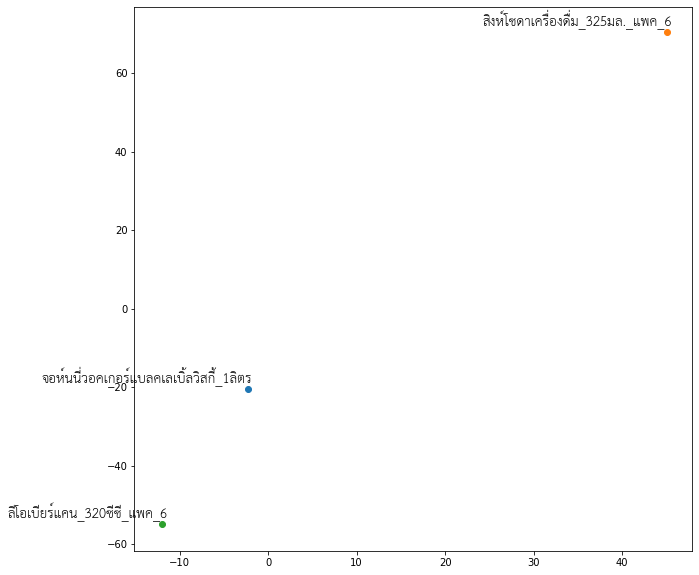

In [321]:
products=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล._แพค_6','ลีโอเบียร์แคน_320ซีซี_แพค_6']
plot_with_labels(tsne_df.set_index('sku_name').loc[products].values[:,:2],products)